In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv(r'G:\Credit_risk_Project\notebooks\data\credit_risk_dataset.csv')

In [8]:
display(df.head())

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [10]:
display(df.describe())

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
display(df.describe(include='object'))

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


Missing values per column:


,Missing Values,Percentage
person_emp_length,895,2.747000
loan_int_rate,3116,9.563856


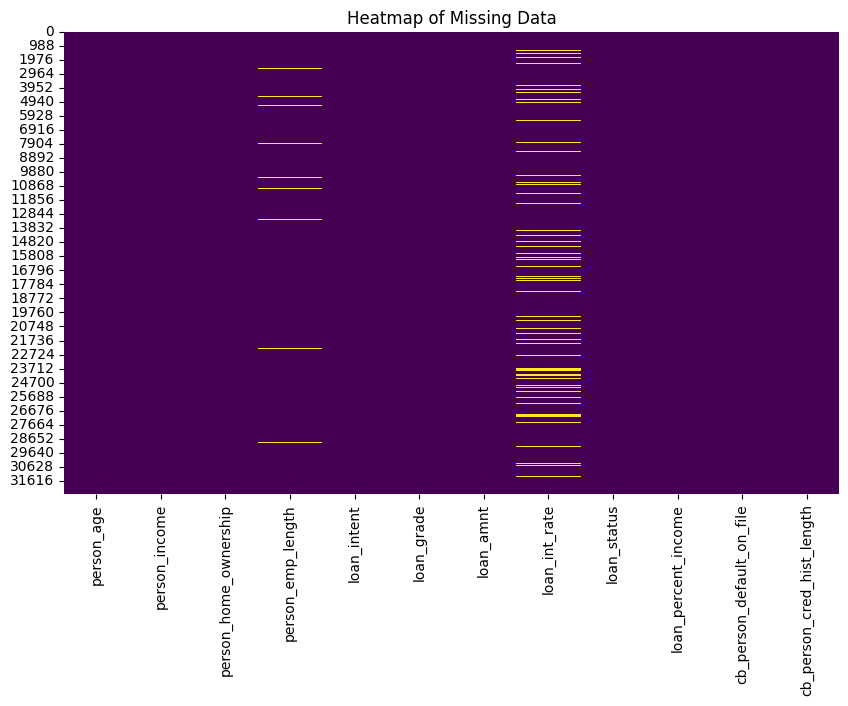

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print("Missing values per column:")
display(missing_info[missing_info['Missing Values'] > 0])

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Data')
plt.show()

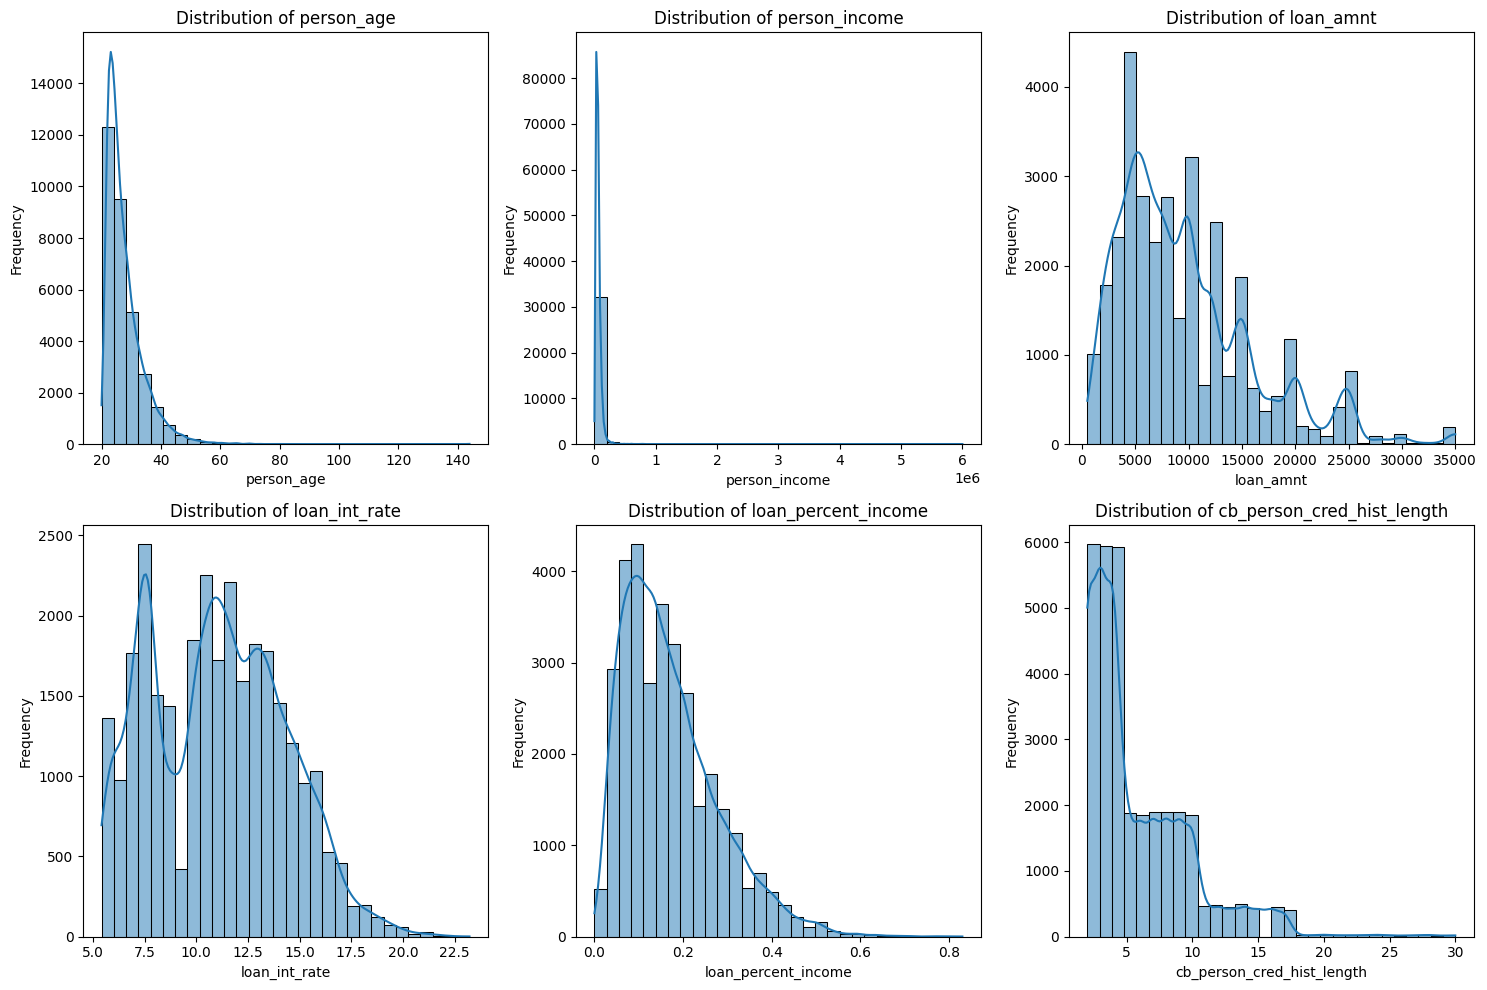

In [13]:
numerical_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'loan_status', 'cb_person_default_on_file']

# Histograms for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

C:\Users\TAZIM\AppData\Local\Temp\ipykernel_7740\3853699740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\TAZIM\AppData\Local\Temp\ipykernel_7740\3853699740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\TAZIM\AppData\Local\Temp\ipykernel_7740\3853699740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='viridis')
C:\Users\TAZIM\AppData\Local\Temp\ipykernel_7740\3853699740.py:5: FutureWarning: 

Passing `palette`

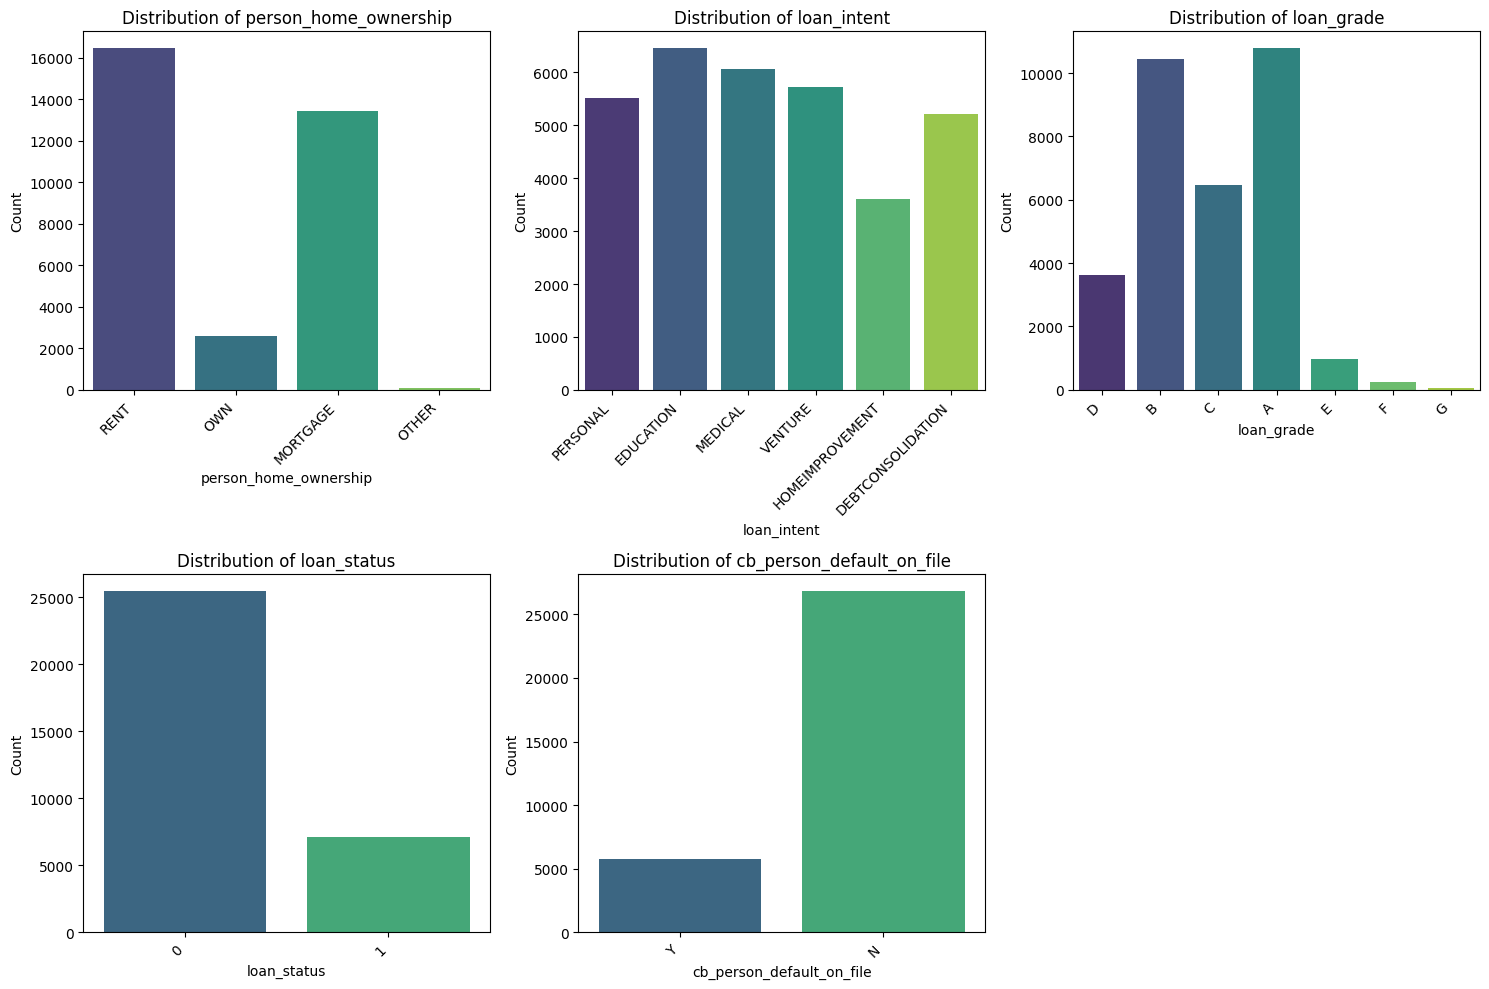

In [14]:
# Count plots for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(data=df, x=col, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

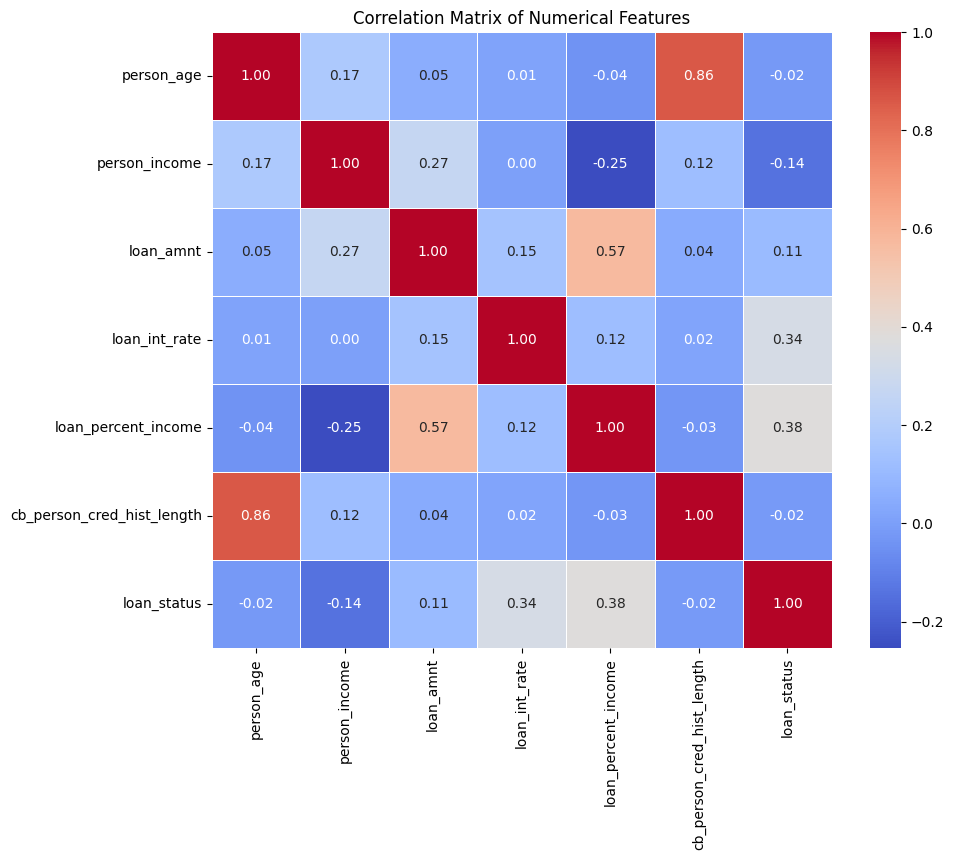

In [15]:
# a correlation matrix for the numerical features and visualize it.
numerical_cols = ['person_age', 'person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


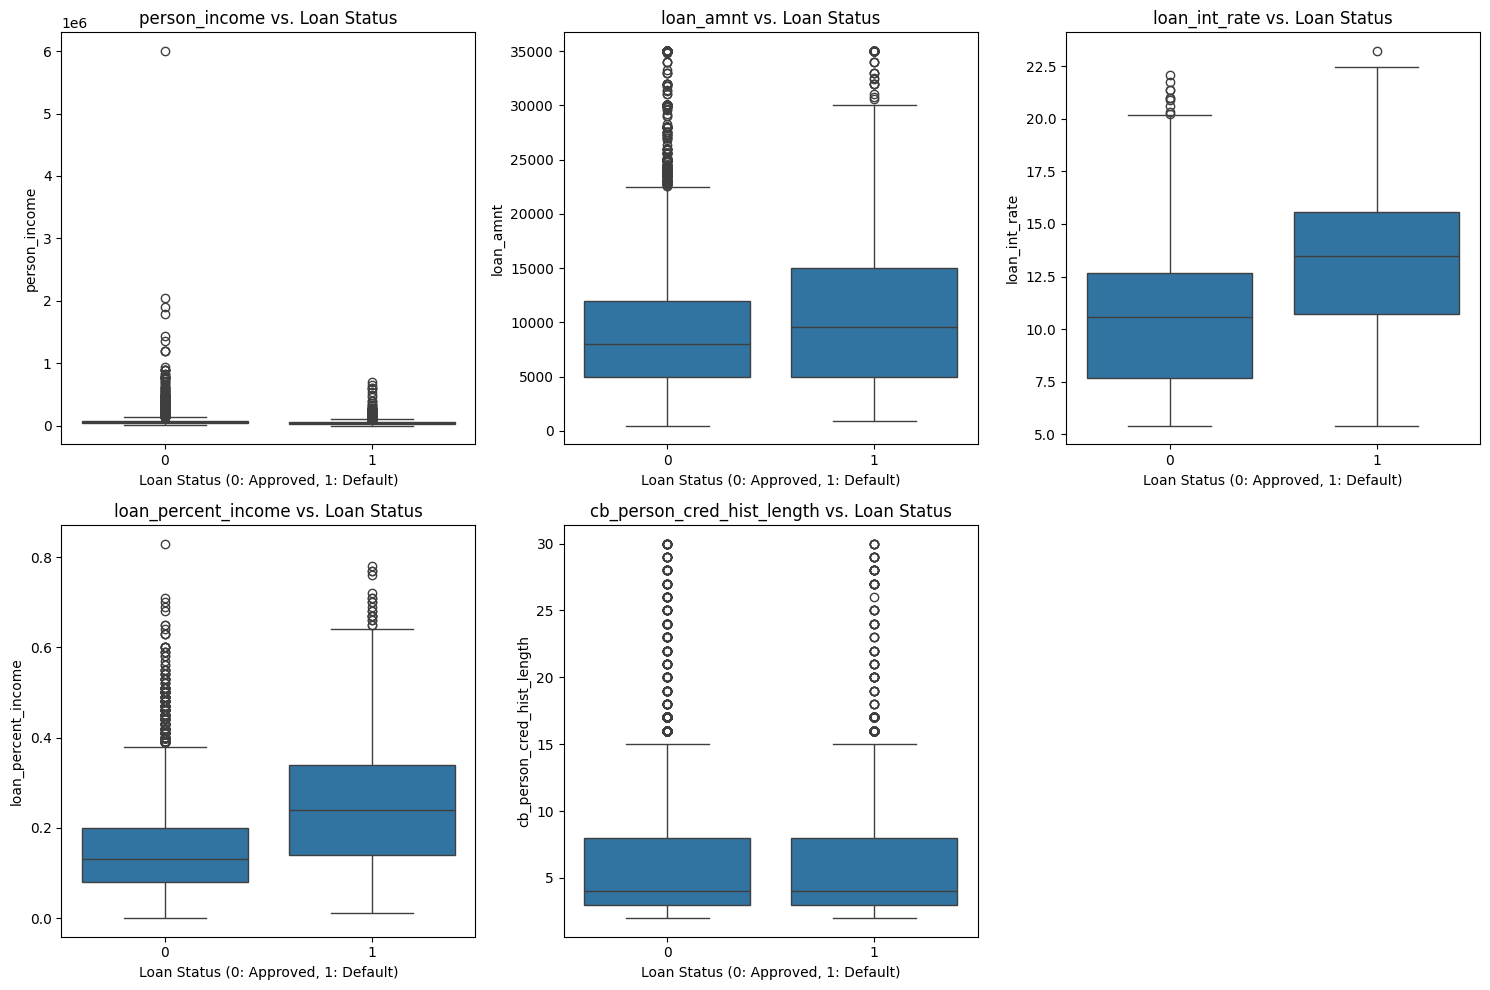

In [16]:
# 2. Visualize relationship between loan_status and key numerical features using box plots.
numerical_features_for_loan_status = ['person_income', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features_for_loan_status):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='loan_status', y=col)
    plt.title(f'{col} vs. Loan Status')
    plt.xlabel('Loan Status (0: Approved, 1: Default)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()


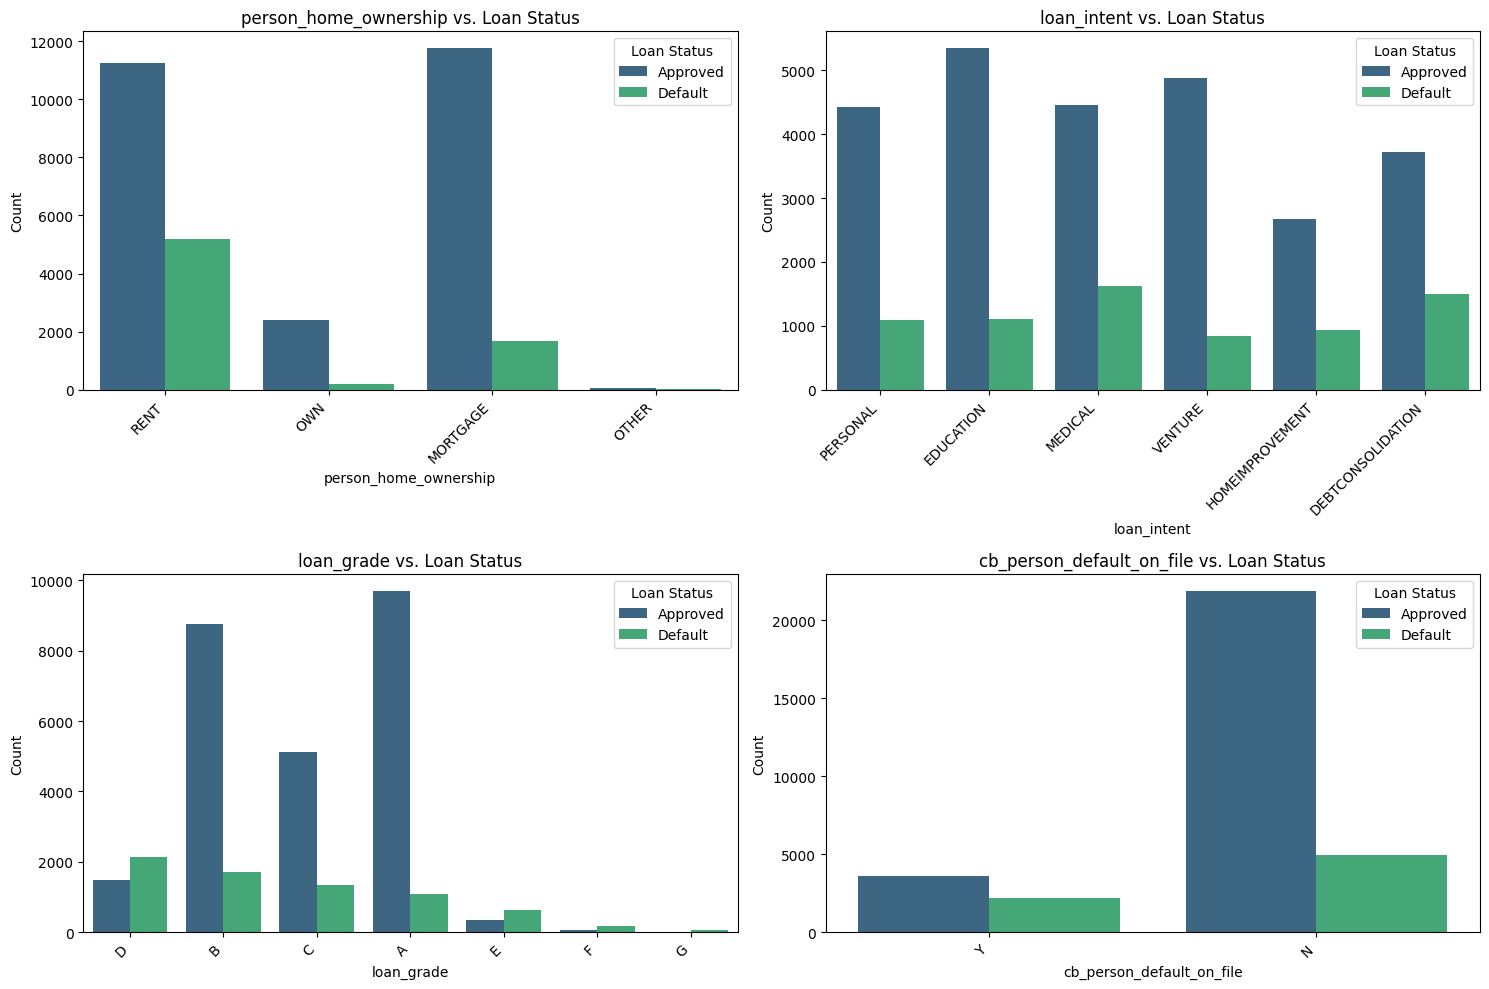

In [17]:
# 3. Visualize relationship between loan_status and key categorical features using count plots.
categorical_features_for_loan_status = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features_for_loan_status):
    plt.subplot(2, 2, i + 1)
    sns.countplot(data=df, x=col, hue='loan_status', palette='viridis')
    plt.title(f'{col} vs. Loan Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Loan Status', labels=['Approved', 'Default'])
plt.tight_layout()
plt.show()

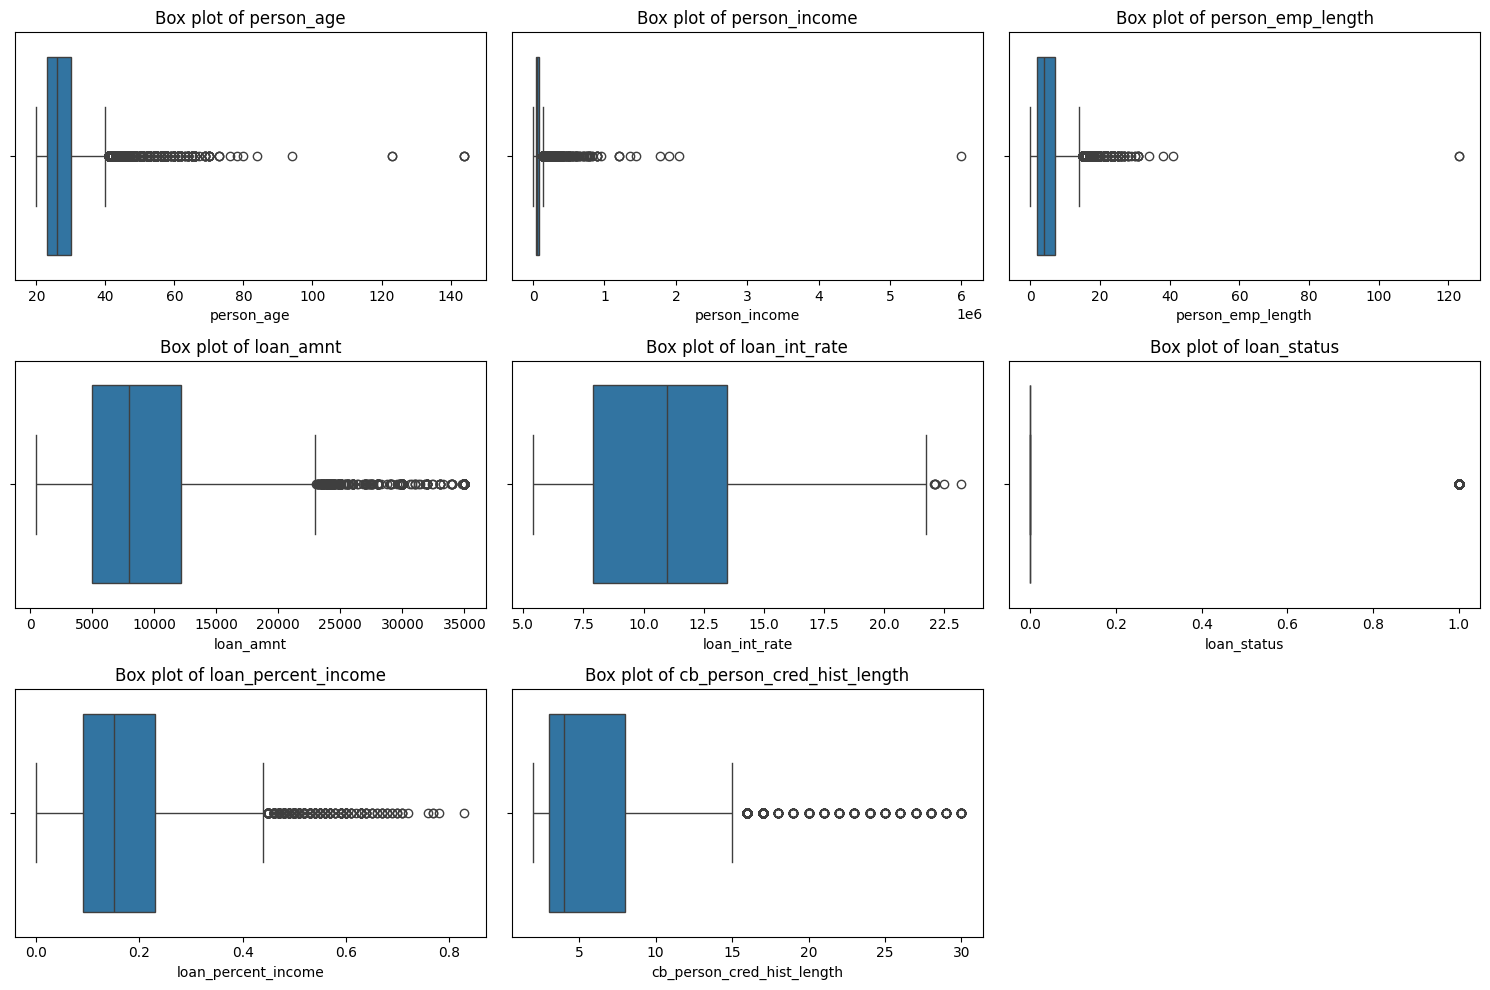

In [18]:
# 1. Select the numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# 2. Create box plots for each selected numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [20]:
outliers_count = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count[col] = outliers.shape[0]

print("Number of outliers per numerical feature (using IQR method):")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Number of outliers per numerical feature (using IQR method):
person_age: 1494
person_income: 1484
person_emp_length: 853
loan_amnt: 1689
loan_int_rate: 6
loan_status: 7108
loan_percent_income: 651
cb_person_cred_hist_length: 1142


In [21]:
print("Key Insights from Exploratory Data Analysis (EDA):")
print("\n1. Data Structure and Quality:")
print("- The dataset contains 32,581 entries and 12 columns, comprising both numerical and categorical features.")
print("- Missing values are present in 'person_emp_length' (2.75%) and 'loan_int_rate' (9.56%). These will need to be addressed in preprocessing.")

print("\n2. Distribution of Features:")
print("- Numerical features like 'person_age', 'person_income', and 'loan_amnt' show right-skewed distributions, indicating the presence of high values.")
print("- Categorical features like 'person_home_ownership' are dominated by 'RENT', and 'loan_grade' shows a concentration in grades 'A', 'B', and 'C'.")
print("- The target variable 'loan_status' is imbalanced, with significantly more approved loans (0) than defaulted loans (1).")

print("\n3. Relationships with Loan Status:")
print("- 'loan_int_rate' and 'loan_percent_income' show a noticeable difference in distribution between approved and defaulted loans, suggesting they are potential predictors.")
print("- Categorical features 'loan_grade' and 'cb_person_default_on_file' exhibit a strong relationship with 'loan_status', with higher grades and previous defaults associated with a higher likelihood of default.")

print("\n4. Outlier Detection:")
print("- Outliers are present in several numerical features, including 'person_age', 'person_income', and 'loan_amnt'. These outliers were visually confirmed with box plots and quantified using the IQR method.")
print("- The presence of outliers may impact certain models and might require specific handling during preprocessing.")

Key Insights from Exploratory Data Analysis (EDA):

1. Data Structure and Quality:
- The dataset contains 32,581 entries and 12 columns, comprising both numerical and categorical features.
- Missing values are present in 'person_emp_length' (2.75%) and 'loan_int_rate' (9.56%). These will need to be addressed in preprocessing.

2. Distribution of Features:
- Numerical features like 'person_age', 'person_income', and 'loan_amnt' show right-skewed distributions, indicating the presence of high values.
- Categorical features like 'person_home_ownership' are dominated by 'RENT', and 'loan_grade' shows a concentration in grades 'A', 'B', and 'C'.
- The target variable 'loan_status' is imbalanced, with significantly more approved loans (0) than defaulted loans (1).

3. Relationships with Loan Status:
- 'loan_int_rate' and 'loan_percent_income' show a noticeable difference in distribution between approved and defaulted loans, suggesting they are potential predictors.
- Categorical features 'lo